# 第1章 多视几何基础知识

In [4]:
%matplotlib inline

  本节主要从2D射影几何入手，介绍多视几何中，射影几何中点，线的一些基本概念和公式。
  
  对应参考章节 *计算机视觉多视觉几何 第0篇*
  

### 齐次坐标
在此之前，相信读者对于欧式几何的一些表达已经非常熟悉。对于平面上的坐标点，广为熟知的使用平面欧式空间$\mathbb{R}^2$的一对坐标$(x,y)$来表达。
在多视几何中，为了表达的统一和公式计算的方便，引入了***齐次坐标***的概念。
初学多视几何，会对这个概念很难理解，"齐次"这个概念很抽象，建议不要过多的去追究这种表达的深层含义，简单的记住就是在传统的坐标表示加上一维（如$(x,y)$增加一维到$(x,y,1)$，二维坐标->三维坐标， 三维坐标->四维坐标）即可，对齐次坐标的理解会在后续的使用中逐渐加深。
### 直线的齐次坐标
平面上一条直线可用形如$ax+by+c=0$的方程表示，即向量$l=(a,b,c)^T$.对于任何非零常数$k$, $l$和$kl$表示的同一条直线。这两个向量是等价的，这种关系下的等价矢量被称为齐次矢量。三维的齐次矢量集合组成了***射影空间 $\mathbb{P}^2$***。射影空间这个概念，在后面会多次用到。
### 点的齐次坐标
点$(x,y)$在直线$l=(a,b,c)^T$上的充要条件是$ax+by+c=0$，在点的二维表示上增加1维，方便写成向量内积形式。

$$(x,y,1)(a,b,c)^T=0$$

形如$p=(x_1,x_2,x_3)^T$是点的齐次坐标，和线的齐次坐标一样，对于非零常数$k$，$p$和$kp$表示同一个点。通过$(\frac{x_1}{x_3},\frac{x_2}{x_3})^T$能够得到点的平面坐标。

使用齐次坐标，可以很方便地表达点和线的关系。
* 点$x$在直线$l$上$$x^Tl=0$$
* 两直线的交点为$$x = l_1×l_2$$
* 过两点的直线为$$l = x_1×x_2$$

其中，×表示向量的叉积。下面用具体的例子来说明上面介绍的齐次坐标及其地一些基本引用。

**例：点和线的齐次坐标**

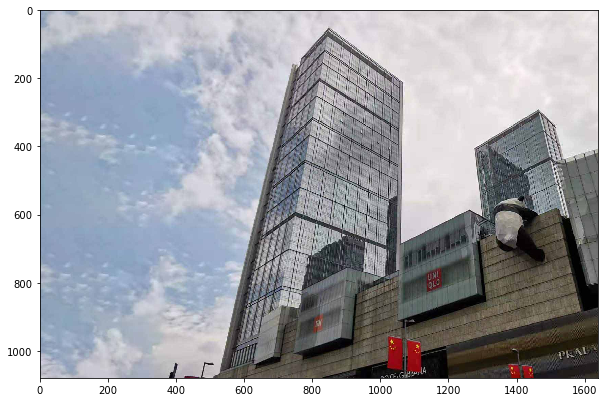

In [5]:
#例：点和线的齐次坐标
import numpy as np
from matplotlib import pyplot as plt
import cv2
import os
img = cv2.imread("./pic/1.jpg")
plt.figure(figsize=(10,10)) 
plt.imshow(img[:,:,::-1])

In [129]:
x11 = np.array([741, 156, 1])
x12 = np.array([526, 1059, 1])
l1 = np.cross(x11, x12)
x21 = np.array([769, 822, 1])
x22 = np.array([1261, 582, 1])
l2 = np.cross(x21, x22)
cross_x = np.cross(l1, l2)
cross_x = cross_x / cross_x[2]
print ("交点坐标: ", cross_x[0], cross_x[1])

交点坐标:  557.9119579500657 924.969776609724


可视化计算结果看一下。

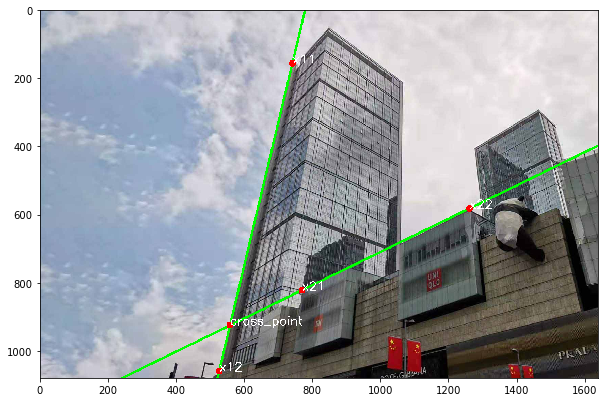

In [130]:
points = [x11, x12, x21, x22, cross_x]
s_points = ["x11", "x12", "x21", "x22", "cross_point"]
lines = [l1, l2]
for l in lines:
    cv2.line(img, (int(-l[2]/l[0]),0), (0, int(-l[2]/l[1])), (0,255,0), 6, 4)
for i in range(0, len(points)):
    p = points[i]
    cv2.circle(img, (int(p[0]), int(p[1])), 10, (0,0,255), -1)
    cv2.putText(img, s_points[i], (int(p[0]), int(p[1])), cv2.FONT_HERSHEY_SIMPLEX, 1.2, (255, 255, 255), 2)
plt.figure(figsize=(10,10)) 
plt.imshow(img[:,:,::-1])

### 无穷远点和无穷远线
无穷远点和无穷远线是射影几何中非常重要的概念，在单目视觉中，如果能在图像中找到无穷远点和无穷远线，能够恢复非常多的信息。这也是两个非常抽象的概念，结合具体的例子能更好地帮助理解。

考察如下例子。

**例:无穷远点和无穷远线**

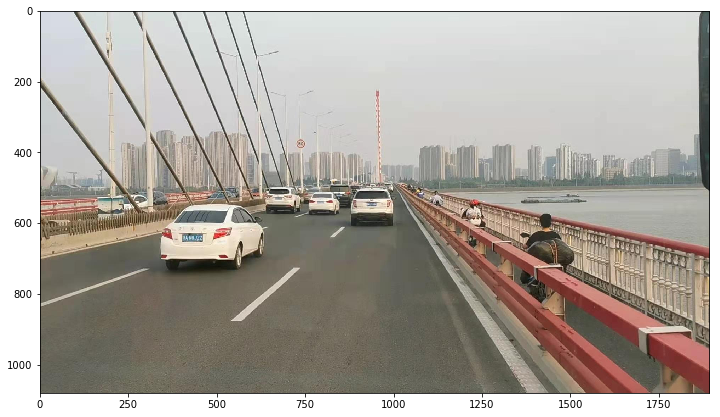

In [26]:
img = cv2.imread("./pic/5.jpg")
plt.figure(figsize=(12,12)) 
plt.imshow(img[:,:,::-1])

对于这张图片，手工标注了左中右三条车道线，每条车道线通过两点来确定，同时使用单应变换得到地面在三维世界下的表示($Z=0$)。关于单应变换，后面会详细阐述，在这里只是为了生成样例数据，来说明无穷远点和无穷远线的概念。读者来不必花太多时间阅读了解此处的代码。

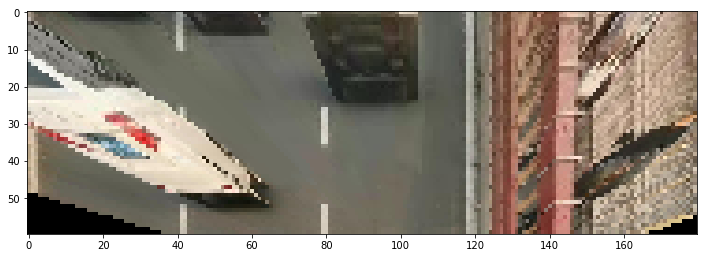

In [27]:
#生成数据，使用手工方式标注出图片里面的三条车道线上两点
l1 = np.array([[1222, 818, 1], [1052, 571, 1]])
l2 = np.array([[614, 818, 1], [902, 571, 1]])
l3 = np.array([[20, 824, 1], [746, 574, 1]])
#两点确定一条直线
l_1 = np.cross(l1[0], l1[1])
l_2 = np.cross(l2[0], l2[1])
l_3 = np.cross(l3[0], l3[1])
l_1 = l_1 / l_1[-1]
l_2 = l_2 / l_2[-1]
l_3 = l_3 / l_3[-1]
lines = [l_1, l_2, l_3]

p2d = [l1[0], l1[1], l2[1], l2[0]]
p3d = [[120,60], [120,0],[80,0],[80,60]]
A = []
for i in range(0, len(p2d)):
    p1 = p3d[i]
    p2 = p2d[i]
    constrain_x = [-p2[0], -p2[1], -1, 0, 0, 0, p2[0]*p1[0], p2[1]*p1[0], p1[0]]
    constrain_y = [0, 0, 0, -p2[0], -p2[1], -1, p2[0]*p1[1], p2[1]*p1[1], p1[1]]
    A.append(constrain_x)
    A.append(constrain_y)
u, s, vT = np.linalg.svd(A)
v = vT.T
H = v[:,-1]
H = H / H[-1]
H = H.reshape(3, 3)

img3d =  np.zeros([60,180,3],np.uint8)
for i in range(0, img.shape[0], 1):
    for j in range(0, img.shape[1], 1):
        p2 = np.array([j, i, 1])
        p21 = H.dot(p2.T)
        p21 = p21 / p21[-1]
        if int(p21[1]) >= img3d.shape[0] or int(p21[0]) >= img3d.shape[1] or int(p21[1]) < 0 or int(p21[0]) < 0:
            continue
        img3d[int(p21[1])][int(p21[0])] = img[i][j]
plt.figure(figsize=(12,12)) 
plt.imshow(img3d[:,:,::-1])

在图像坐标系和地面坐标系分别可视化车道线元素。

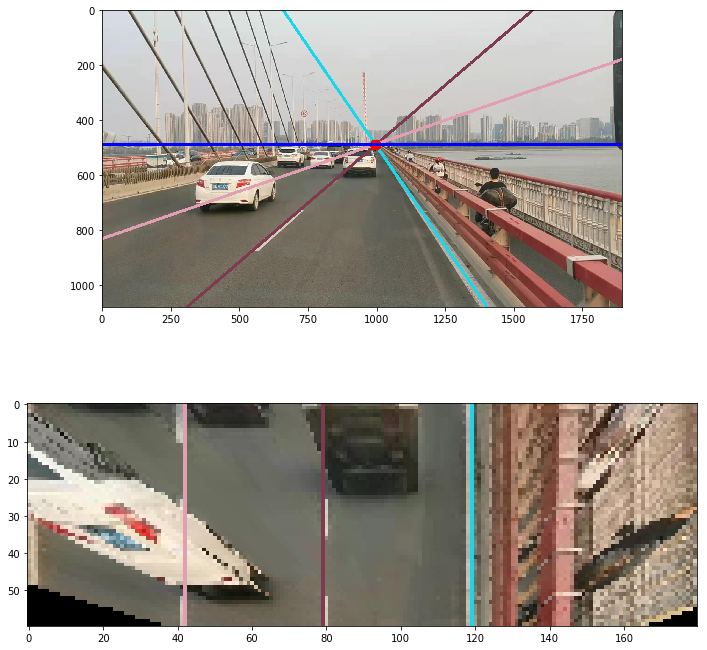

In [37]:
import random
r = random.randint(0, 255)
g = random.randint(0, 255)
b = random.randint(0, 255)
vis = img.copy()
#画车道线
for l in lines:
    r = (r + 100) % 255
    b = (b + 100) % 255
    g = (g + 100) % 255
    p1 = (int(-l[2]/l[0]),0)
    p2 = (int((-l[2] - img.shape[0] * l[1])/l[0]), img.shape[0])
    cv2.line(vis, p1, p2, (b,g,r), 10, 4)
    p3d = H.dot(np.array([p2[0], p2[1], 1]))
    cv2.line(img3d, (int(p3d[0]/p3d[2]), 0), (int(p3d[0]/p3d[2]), img3d.shape[0]), \
             (b,g,r), 1, 4)
#无穷远点
vanish_point = np.cross(l_1, l_2)
vanish_point = vanish_point / vanish_point[-1]
cv2.circle(vis, (int(vanish_point[0]), int(vanish_point[1])), 20, (0,0,255), -1)
#无穷远线，这里为了方便可视化，假设相机是水平的（事实上往往不是如此！）
cv2.line(vis, (0,int(vanish_point[1])), (vis.shape[1], int(vanish_point[1])), (255,0,0), 10, -1)

plt.figure(figsize=(12,12)) 
ax1 = plt.subplot(2,1,1)
plt.imshow(vis[:,:,::-1])
ax1 = plt.subplot(2,1,2)
plt.imshow(img3d[:,:,::-1])

到目前为止，已经完成了样例数据的构建，包括一张拍摄的照片和恢复的地面。三维空间下的地平面$z=0$是标准的欧式空间，投影到相机画面是一个射影变换。（具体可参照第x章）

在欧式空间下的三条车道线是三条平行线，平行线没有交点，这是欧式空间下的大家的认识。但是如果使用齐次坐标，来到射影空间下，会有不一样的结论。考虑左、中两条车道线，其线方程分别为$x=40$和$x=8$,用齐次表示分别为$l_1 = (1,0,-40)^T$，$l_2 = (1,0,-80)^T$，得到交点坐标为$(0,40,0)^T$。如果通过$(\frac{x_1}{x_3},\frac{x_2}{x_3})^T$来计算非齐次坐标，由于$x_3=0$，得到的结果是无穷大，在欧式空间没有任何有限点与其对应，这样的点就叫做***无穷远点***。在图像中用红色圆点标注，这是一个在y轴方向的无穷远点。下图从另一个角度展示了无穷远点。
<img src="./pic/figure/1_1.png", width=320, heigth=240>

<font color=#A9A9A9 size=2><center>Robotics: Perception from Coursera </center></font>

通常的，当$x_3\neq0$时，齐次矢量$x=(x_1,x_2,x_3)^T$对应于$\mathbb{R}^2$中的有限点。可以把最后坐标为$x_3=0$的点加入$\mathbb{R}^2$， 所扩展的空间是所有齐次三维矢量的集合，称为射影空间$\mathbb{P}^2$。形如$(x_1,x_2,0)^T$的点被称为无穷远点。所有无穷远点在一条直线${\bf{l_\infty}}=(0,0,1)^T$上，这条直线叫做***无穷远线***。在图象中用蓝色水平线标注，地平线、海平面都是大家常见的射影空间中的无穷远线。下图从另一个角度展示了无穷远线，是过相机光心的水平面和图像平面的交线。
<img src="./pic/figure/1_2.png", width=320, heigth=240>

<font color=#A9A9A9 size=2><center>Robotics: Perception from Coursera </center></font>

引人无穷远点概念后点与直线相交的概念得到了简化.在射影空间$\mathbb{P}^2$中，我们可
以不加思索地说任意两条相异直线都相交于一点而任意两个相异的点都在一条直线上。但在标准欧式空间$\mathbb{R}^2$中却不成立，其中平行线就构成一个特例。

### 二次曲线 
最后，简单介绍一下二次曲线。在非齐次坐标下，二次曲线的方程是

$$ax^2+bxy+cy^2+dx+ey+f=0$$.

五点可以定义一条二次曲线，每个点可以提供一个约束，建立约束方程为

$$ \left[ \begin{array} {ccccc}
x_1^2&x_1y_1&y_1^2&x_1&y_1\\
\ldots \\
x_5^2&x_5y_5&y_5^2&x_5&y_5\\
\end{array} \right] \bf{c}=\bf{0}$$

其中，${\bf{c}}=(a,b,c,d,e,f)^T$.上式需要求解${\bf{c}}$，是一个经典求解$AX=0$的问题，在后续的章节中会反复出现，很多参数都可以通过构建这样形式的方程来求解。具体的数学推导可以参考**附录多视几何中常用的数学方法**。

**例：二次曲线**

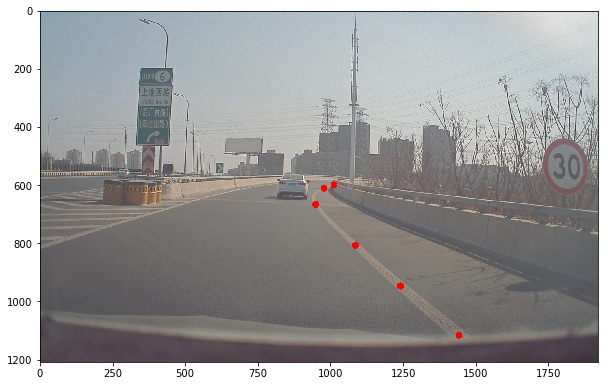

In [105]:
img = cv2.imread("./pic/2.jpg")
points = [
    np.array([1441,1116,1]),
    np.array([1240,947,1]),
    np.array([1085,807,1]),
    np.array([948,667,1]),
    np.array([977,611,1]),
    np.array([1011,599,1])]
for p in points:
    cv2.circle(img, (p[0], p[1]), 12, (0,0,255), -1)
plt.figure(figsize=(10,10)) 
plt.imshow(img[:,:,::-1])

In [106]:
from numpy.linalg import svd
A = []
for p in points:
    constrain = [p[0]*p[0], p[0]*p[1], p[1]*p[1], p[0], p[1],1]
    A.append(constrain)
A = np.array(A)
u, s, vT = np.linalg.svd(A)
v = vT.T
C = v[:,-1]
print("拟合残差:")
for p in points:
    constrain = np.array([p[0]*p[0], p[0]*p[1], p[1]*p[1], p[0], p[1],1]) 
    print(constrain.dot(C))

拟合残差:
-0.0038333948572762955
0.010241157799499079
-0.006423157560122461
-0.002762420639721319
0.0054808203395145805
-0.002909963171121688


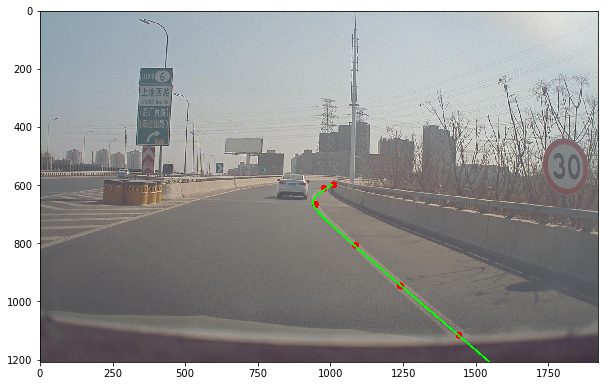

In [107]:
for y in range(points[-1][1],img.shape[0]):
    coefficient = [C[0], C[1] * y + C[3], C[2] * y * y + C[4] * y + C[5]]
    x = 0.5*(-coefficient[1] - np.sqrt(pow(coefficient[1], 2) - 4*coefficient[0]*coefficient[2]))/coefficient[0]
    cv2.circle(img, (int(x), y), 3, (0,255,0), -1)
plt.figure(figsize=(10,10)) 
plt.imshow(img[:,:,::-1])